#  Analiza UK Top 40

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# naloži podatke
df = pd.read_csv('uk_top_40.csv')
df['datum'] = pd.to_datetime(df['datum'], format='%Y%m%d', errors='coerce')

# osnovni pregled
print(df.head(3))
print(df.dtypes)

       datum  pozicija        naslov                       izvajalec  \
0 2020-08-30         1  HEAD & HEART              JOEL CORRY FT MNEK   
1 2020-08-30         2           WAP  CARDI B FT MEGAN THEE STALLION   
2 2020-08-30         3      DYNAMITE                             BTS   

   tedni_na_lestvici  najvisja_pozicija  
0                  8                  1  
1                  3                  2  
2                  1                  3  
datum                datetime64[ns]
pozicija                      int64
naslov                       object
izvajalec                    object
tedni_na_lestvici             int64
najvisja_pozicija             int64
dtype: object


## Uvoz funkcij iz `analiza_funkcije.py`

In [2]:
from analiza_funkcije import (
    top_n_izvajalci,
    top_pesmi_po_tednih,
    top_pesmi_po_najvisji,
    pesmi_izvajalca,
    najvecji_skoki,
    trajektorija_pesmi
)

## Top izvajalci (tabela + graf)

,izvajalec,stevilo_pojavitev
0,ED SHEERAN,208
1,TAYLOR SWIFT,182
2,BILLIE EILISH,163
3,TATE MCRAE,154
4,SABRINA CARPENTER,151
5,CHAPPELL ROAN,142
6,BENSON BOONE,141
7,TEDDY SWIMS,140
8,OLIVIA RODRIGO,137
9,HARRY STYLES,135


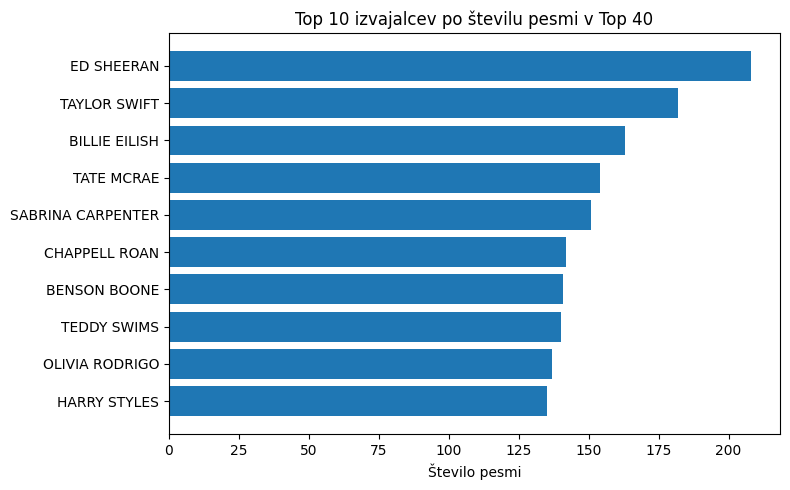

In [3]:
top10 = top_n_izvajalci(df, 10)
display(top10)

plt.figure(figsize=(8,5))
plt.barh(top10['izvajalec'][::-1], top10['stevilo_pojavitev'][::-1])
plt.title('Top 10 izvajalcev po številu pesmi v Top 40')
plt.xlabel('Število pesmi')
plt.tight_layout()
plt.show()

## Pesmi z največ tedni na lestvici (tabela)

In [4]:
top_tedni = top_pesmi_po_tednih(df, 15)
display(top_tedni)

,datum,pozicija,naslov,izvajalec,tedni_na_lestvici,najvisja_pozicija
7110,2024-01-07,31,MR BRIGHTSIDE,KILLERS,391,10
9121,2024-12-29,2,ALL I WANT FOR CHRISTMAS IS YOU,MARIAH CAREY,139,1
9125,2024-12-29,6,FAIRYTALE OF NEW YORK,POGUES FT KIRSTY MACCOLL,133,2
6069,2023-07-09,30,HEAT WAVES,GLASS ANIMALS,132,5
9145,2024-12-29,26,MERRY XMAS EVERYBODY,SLADE,124,1
9515,2025-03-02,36,WHATEVER,OASIS,113,3
9128,2024-12-29,9,DO THEY KNOW IT'S CHRISTMAS,BAND AID,111,1
6837,2023-11-19,38,POMPEII,BASTILLE,109,2
2958,2022-01-09,39,BLINDING LIGHTS,WEEKND,106,1
9120,2024-12-29,1,LAST CHRISTMAS,WHAM,105,1


## Pesmi z najboljšo najvišjo pozicijo (tabela)

In [5]:
top_best = top_pesmi_po_najvisji(df, 15)
display(top_best)

,datum,pozicija,naslov,izvajalec,tedni_na_lestvici,najvisja_pozicija
0,2020-08-30,1,HEAD & HEART,JOEL CORRY FT MNEK,8,1
4962,2023-01-01,3,MERRY CHRISTMAS,ED SHEERAN & ELTON JOHN,10,1
4970,2023-01-01,11,DO THEY KNOW IT'S CHRISTMAS,BAND AID,99,1
4974,2023-01-01,15,MERRY CHRISTMAS EVERYONE,SHAKIN' STEVENS,90,1
4985,2023-01-01,26,MERRY XMAS EVERYBODY,SLADE,114,1
5000,2023-01-08,1,ESCAPISM,RAYE FT 070 SHAKE,7,1
5001,2023-01-08,2,ANTI-HERO,TAYLOR SWIFT,11,1
5012,2023-01-08,13,UNHOLY,SAM SMITH & KIM PETRAS,15,1
5015,2023-01-08,16,I'M GOOD (BLUE),DAVID GUETTA & BEBE REXHA,19,1
5018,2023-01-08,19,AS IT WAS,HARRY STYLES,40,1


## Pesmi za izbranega izvajalca

In [6]:
summary = pesmi_izvajalca(df, 'Kendrick Lamar')  
display(summary.head(10))

,naslov,pojavitve,povp_poz,najvisja,max_tedni
7,NOT LIKE US,21,12.809524,1,30
8,SQUABBLE UP,2,15.500000,4,2
4,LUTHER,14,19.857143,4,16
1,ALL THE STARS,5,11.200000,5,27
6,N95,3,20.333333,6,3
10,TV OFF,4,25.500000,6,6
2,DIE HARD,4,21.250000,7,4
3,EUPHORIA,3,22.666667,11,4
11,UNITED IN GRIEF,1,14.000000,14,1
9,THE HEART - PT 5,1,24.000000,24,1


## Največji tedenski dvigi/padci (zadnji teden v podatkih)

In [7]:
zadnji = df['datum'].max()
risers, fallers = najvecji_skoki(df, zadnji)
print('Zadnji teden:', zadnji.date())
print('Top dvigi:')
display(risers)
print('Top padci:')
display(fallers)

Zadnji teden: 2025-08-24
Top dvigi:


,naslov,izvajalec,pozicija_prev,pozicija_cur,sprememba
20,JUMP,BLACKPINK,28,22,6
7,NICE TO EACH OTHER,OLIVIA DEAN,14,9,5
29,TAKEDOWN,TWICE,35,31,4
25,DEALER,LOLA YOUNG,31,27,4
18,PINK PONY CLUB,CHAPPELL ROAN,23,20,3
2,SODA POP,SAJA BOYS/ANDREW CHOI/NECKWAV,6,3,3
12,12 TO 12,SOMBR,17,14,3
9,IN ME IN,SAM FENDER & OLIVIA DEAN,13,11,2
22,BACK TO FRIENDS,SOMBR,26,24,2
26,SPARKS,COLDPLAY,30,28,2


Top padci:


,naslov,izvajalec,pozicija_prev,pozicija_cur,sprememba
30,BEAUTIFUL THINGS,BENSON BOONE,10,32,-22
24,A LITTLE MORE,ED SHEERAN,18,26,-8
34,CIGARETTES & ALCOHOL,OASIS,34,39,-5
28,BLESSINGS,CALVIN HARRIS/DOUGLAS,25,30,-5
33,APT,ROSE & BRUNO MARS,33,37,-4
13,YUKON,JUSTIN BIEBER,12,15,-3
10,SAPPHIRE,ED SHEERAN,9,12,-3
15,ETERNITY,ALEX WARREN,15,17,-2
11,VICTORY LAP,FRED AGAIN/SKEPTA/PLAQUEBOYMAX,11,13,-2
8,ORDINARY,ALEX WARREN,8,10,-2


## Trajektorija izbrane pesmi (primer)

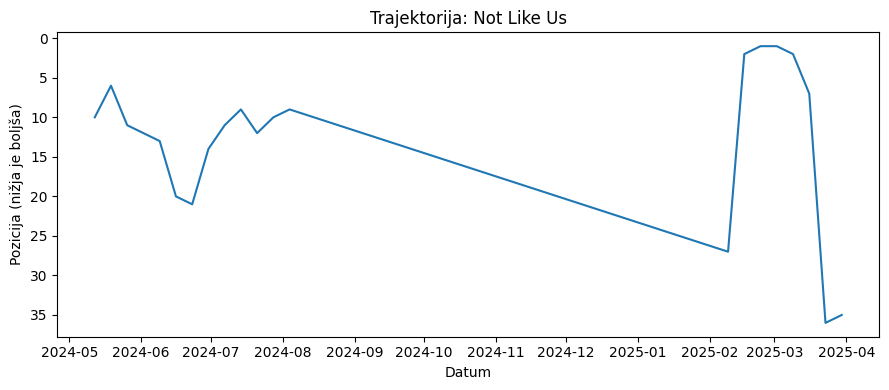

In [8]:
trajektorija_pesmi(df, 'Not Like Us')